## **Comparative Analysis of Driving Performance Between Men and Women in France: An Examination of Traffic Accident Data**

<p align="center">
  <img src="https://www.neozone.org/blog/wp-content/uploads/2024/05/societe-femme-volant-voiture-accident-005.jpg"/>
</p>



**Project Objective**
The goal of this project is to analyze the database of accidents in France to address the issue: Who drives better, men or women? Based on what we hear around us, it is often said that women do not know how to drive and cause problems and road accidents. If we notice an accident, we hear men say, "Oh, it must have been a woman who did that." Let's analyze and find out if they are right or not.

### **Database Information:**
The dataset contains information about individuals involved in traffic accidents in France in 2022. Each row represents a unique individual in a specific accident. Below is an explanation of each column in the dataset:

- **Num_Acc:** The accident number. This is a unique identifier for each accident.
- **id_usager:** The user's ID. This is a unique identifier for each individual involved in an accident.
- **id_vehicule:** The vehicle ID. This is a unique identifier for each vehicle involved in an accident.
- **num_veh:** The vehicle number, usually denoted by a letter and number combination (e.g., A01, B01).
- **place:** The place or position of the user in the vehicle.
- **catu:** The category of the user (e.g., driver, passenger, pedestrian)(1 : Conducteur; 2 : Passager; 3 : Piéton; 4 : Piéton en roller ou en trottinette (catégorie déplacée, à partir de l’année 2018).
- **grav:** The severity of the injury suffered by the user (e.g., uninjured, killed, injured).
- **sexe:** The sex of the user (1 for male, 2 for female).
- **an_nais:** The year of birth of the user.
- **trajet:** The type of journey (e.g., home-work, home-school, shopping).
- **secu1:** The first safety equipment used (e.g., seatbelt, helmet).
- **secu2:** The second safety equipment used, if any.
- **secu3:** The third safety equipment used, if any.
- **locp:** The location or specific point of impact.
- **actp:** The action of the pedestrian, if applicable.
- **etatp:** The state or condition of the pedestrian, if applicable.

### **Data Extraction**

Extraction of the database from the Road Traffic Injury Data (BAAC)
Website: Data.gouv.fr (https://www.data.gouv.fr/en/datasets/base-de-donnees-accidents-corporels-de-la-circulation/)

This database contains detailed information on road traffic injuries in France. You can directly download the data files in CSV format.

In [2]:
import pandas as pd
import requests
from io import StringIO

# Function to download CSV from a URL and load it into a DataFrame
def download_csv(url):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    return pd.read_csv(StringIO(response.text), sep=';')

# URLs of the CSV files for each year
urls = {
    '2022': 'https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2021/20231005-094229/usagers-2022.csv',
    '2021': 'https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2022/20231009-140337/usagers-2021.csv',
    '2020': 'https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2019/20211110-111817/usagers-2020.csv',
    '2019': 'https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2021/20231005-094229/usagers-2022.csv',

}

# List to hold DataFrames for each year
dataframes = []

# Loop through URLs, download and append each DataFrame to the list
for year, url in urls.items():
    try:
        df = download_csv(url)
        df['year'] = year  # Add a column for the year
        dataframes.append(df)
        print(f"Data for {year} loaded successfully.")
    except requests.HTTPError as e:
        print(f"Failed to download data for {year}: {e}")

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to a CSV file
combined_df.to_csv('combined_usagers_2019_2022_1.csv', index=False, sep=';')

print("Combined CSV file saved successfully.")



Data for 2022 loaded successfully.
Data for 2021 loaded successfully.
Data for 2020 loaded successfully.
Data for 2019 loaded successfully.
Combined CSV file saved successfully.


### **Exploratory Data Analysis and Cleaning**

Display the first rows of the dataframe.
Display information about the dataframe.
Check for missing values.

In [3]:
# Afficher les premières lignes du dataframe
combined_df.head()

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,year
0,202200000001,1Â 099Â 700,813Â 952,A01,1,1,3,1,2008.0,5,2,8,-1,-1,-1,-1,2022
1,202200000001,1Â 099Â 701,813Â 953,B01,1,1,1,1,1948.0,5,1,8,-1,-1,-1,-1,2022
2,202200000002,1Â 099Â 698,813Â 950,B01,1,1,4,1,1988.0,9,1,0,-1,0,0,-1,2022
3,202200000002,1Â 099Â 699,813Â 951,A01,1,1,1,1,1970.0,4,1,0,-1,0,0,-1,2022
4,202200000003,1Â 099Â 696,813Â 948,A01,1,1,1,1,2002.0,0,1,0,-1,-1,-1,-1,2022


In [4]:
# Afficher des informations sur le dataframe
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487867 entries, 0 to 487866
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      487867 non-null  int64  
 1   id_usager    382572 non-null  object 
 2   id_vehicule  487867 non-null  object 
 3   num_veh      487867 non-null  object 
 4   place        487867 non-null  int64  
 5   catu         487867 non-null  int64  
 6   grav         487867 non-null  int64  
 7   sexe         487867 non-null  int64  
 8   an_nais      479052 non-null  float64
 9   trajet       487867 non-null  int64  
 10  secu1        487867 non-null  int64  
 11  secu2        487867 non-null  int64  
 12  secu3        487867 non-null  int64  
 13  locp         487867 non-null  int64  
 14  actp         487867 non-null  object 
 15  etatp        487867 non-null  int64  
 16  year         487867 non-null  object 
dtypes: float64(1), int64(11), object(5)
memory usage: 63.3+ MB


In [5]:
combined_df.describe()

,Num_Acc,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,etatp
count,4.878670e+05,487867.000000,487867.000000,487867.000000,487867.000000,479052.000000,487867.000000,487867.000000,487867.000000,487867.000000,487867.000000,487867.000000
mean,2.021304e+11,2.077529,1.328918,2.523561,1.274530,1982.941879,3.197207,1.856328,0.958062,-0.916606,-0.203660,-0.830312
std,8.018936e+07,2.573030,0.609893,1.379097,0.551648,18.878191,2.777611,2.268157,3.033094,0.884337,1.206727,0.615144
min,2.020000e+11,-1.000000,1.000000,-1.000000,-1.000000,1900.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.021000e+11,1.000000,1.000000,1.000000,1.000000,1970.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,2.022000e+11,1.000000,1.000000,3.000000,1.000000,1986.000000,4.000000,1.000000,0.000000,-1.000000,0.000000,-1.000000
75%,2.022000e+11,2.000000,2.000000,4.000000,2.000000,1998.000000,5.000000,2.000000,0.000000,-1.000000,0.000000,-1.000000
max,2.022001e+11,10.000000,3.000000,4.000000,2.000000,2022.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000


In [6]:
# Vérifier les valeurs manquantes
print(combined_df.isnull().sum())

Num_Acc             0
id_usager      105295
id_vehicule         0
num_veh             0
place               0
catu                0
grav                0
sexe                0
an_nais          8815
trajet              0
secu1               0
secu2               0
secu3               0
locp                0
actp                0
etatp               0
year                0
dtype: int64


#### **Unnecessary Column Removal and Driver Filtering**

To answer our question, we do not need all the columns, for example, the vehicul's ID; we just need to know their sex, age, accident severity, etc. So, we will start by deleting the unnecessary columns, and after that, we don't need information about passengers and pedestrians; we want to analyze only the drivers, so we will filter out the drivers only.

In [7]:
# Liste des colonnes à supprimer (sans 'id_usager')
columns_to_drop = [
    'Num_Acc', 'id_vehicule', 'num_veh', 'place', 'locp', 'actp', 'etatp'
]

# Supprimer les colonnes inutiles
data_cleaned = combined_df.drop(columns=columns_to_drop)

# Filtrer les données pour ne conserver que les conducteurs (catu = 1)
data_drivers = data_cleaned[data_cleaned['catu'] == 1]

# Supprimer la colonne 'catu' après filtrage
data_drivers = data_drivers.drop(columns=['catu'])

# Enregistrer la base de données nettoyée dans un fichier CSV
cleaned_file_path = 'cleaned_data_drivers_with_id.csv'
data_drivers.to_csv(cleaned_file_path, index=False, sep=';')



In [8]:
data_drivers.head()

,id_usager,grav,sexe,an_nais,trajet,secu1,secu2,secu3,year
0,1Â 099Â 700,3,1,2008.0,5,2,8,-1,2022
1,1Â 099Â 701,1,1,1948.0,5,1,8,-1,2022
2,1Â 099Â 698,4,1,1988.0,9,1,0,-1,2022
3,1Â 099Â 699,1,1,1970.0,4,1,0,-1,2022
4,1Â 099Â 696,1,1,2002.0,0,1,0,-1,2022


In [9]:
data_drivers.isnull().sum()

id_usager    78173
grav             0
sexe             0
an_nais       8809
trajet           0
secu1            0
secu2            0
secu3            0
year             0
dtype: int64

##### **Impute Missing Values**

Replace missing values in id_usager with the corresponding row number and missing values in 'an_nais' with "inconnu".

In [10]:
import pandas as pd

# Chemin vers le fichier
file_path = 'cleaned_data_drivers_with_id.csv'

# Charger la base de données
combined_df = pd.read_csv(file_path, sep=';')

# Remplacement des valeurs manquantes dans 'id_usager' par le numéro de ligne
combined_df['id_usager'] = combined_df['id_usager'].fillna(combined_df.index.to_series().astype(str))

# Remplacement des valeurs manquantes dans 'an_nais' par 'non spécifié'
combined_df['an_nais'] = combined_df['an_nais'].fillna('inconnu')

# Vérifier les valeurs manquantes après imputation
missing_values_after_imputation = combined_df.isnull().sum()

# Enregistrer la base de données nettoyée dans un fichier CSV
cleaned_file_path = 'final_cleaned_data_drivers_with_id_corrected_2.csv'
combined_df.to_csv(cleaned_file_path, index=False, sep=';')

missing_values_after_imputation, cleaned_file_path


<ipython-input-10-170edff3a11a>:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv(file_path, sep=';')


(id_usager    0
 grav         0
 sexe         0
 an_nais      0
 trajet       0
 secu1        0
 secu2        0
 secu3        0
 year         0
 dtype: int64,
 'final_cleaned_data_drivers_with_id_corrected_2.csv')

### **Specific Questions to Explore**


After exploring and cleaning our database, here are the questions we can ask to address our overall issue:

**1- Accident Distribution**

- What is the total number of accidents involving men and women?
-Is there a significant difference in the accident rate between men and women?

**2- Accident Severity**

- What is the average severity of accidents for each sex?
- Are there significant differences in the severity of accidents between men and women?

**3- Driving Conditions**

- How do age and driving experience influence accident rates for each sex?

### **Analysis Results and Visualizations**

#### **1. Accident Distribution**

**a. Total Number of Accidents Involving Men and Women**

- Import necessary libraries and data.
- Filter out records with missing or invalid sex information.
- Group data by year and sex, then count accidents.
- Replace sex values with readable labels (1: 'Male', 2: 'Female').
- Create a bar chart to visualize the distribution of accidents by sex and year.

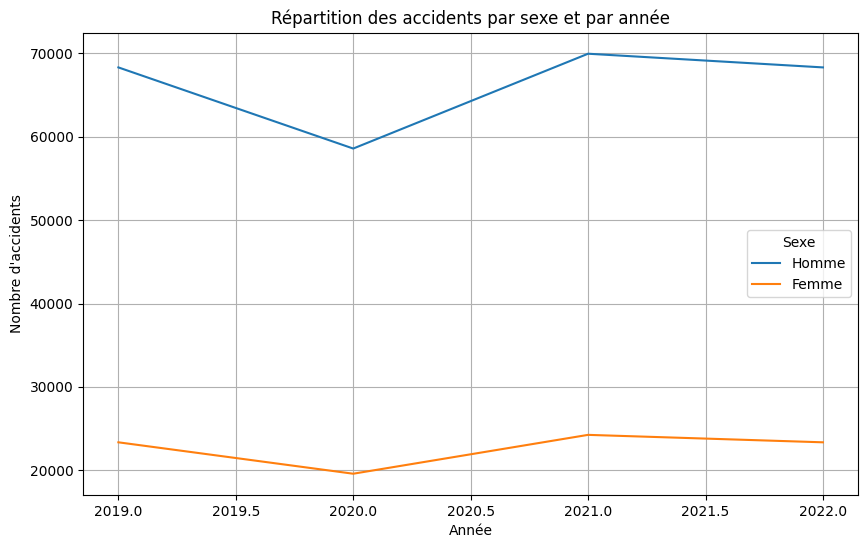

In [20]:
import matplotlib.pyplot as plt

# Chemin vers le fichier nettoyé
file_path = 'final_cleaned_data_drivers_with_id_corrected_2.csv'

# Charger la base de données nettoyée
data = pd.read_csv(file_path, sep=';', low_memory=False)

# Filtrer les données pour exclure les enregistrements avec sexe -1
data_filtered = data[data['sexe'] != -1]

# Créer un DataFrame pour les accidents par sexe et par année
accidents_by_sex_year = data_filtered.groupby(['year', 'sexe']).size().reset_index(name='count')

# Remplacer les valeurs de 'sexe' pour les rendre plus lisibles
accidents_by_sex_year['sexe'] = accidents_by_sex_year['sexe'].replace({1: 'Homme', 2: 'Femme'})

# Créer le graphique en lignes avec matplotlib
plt.figure(figsize=(10, 6))
for sexe in accidents_by_sex_year['sexe'].unique():
    subset = accidents_by_sex_year[accidents_by_sex_year['sexe'] == sexe]
    plt.plot(subset['year'], subset['count'], label=sexe)

plt.xlabel('Année')
plt.ylabel("Nombre d'accidents")
plt.title("Répartition des accidents par sexe et par année")
plt.legend(title='Sexe')
plt.grid(True)

# Sauvegarder le graphique en tant qu'image PNG
plt.savefig('accidents_by_sex_year.png')

# Afficher le graphique
plt.show()




To ensure our analysis is fair and accurate, we need to compare the percentage of accidents by gender, but also by the number of men and women who have a driving license. If there are only 100 women with a license and 1,000 men, this will not give us accurate information about who causes more accidents. Therefore, I did further research to find out the percentage of men and women who have a category B license (car license). Here are the sites used:  https://www.onisr.securite-routiere.gouv.fr/  and I found the information in this PDF: https://www.onisr.securite-routiere.gouv.fr/sites/default/files/2024-01/2024%2001%2031_ONISR_Accidentalit%C3%A9_Bilan_provisoire_2023%2017h25.pdf.

**License Distribution**

Men hold the majority of driving licenses in France. According to ONISR reports, about 55% of category B (car) licenses are held by men, while 45% are held by women.

These figures have been relatively stable in recent years and show a slight male dominance in holding driving licenses.


- **Accident Rate by Gender and Year:**

 Displays the accident rate weighted by the percentage of licenses held by each gender. This allows for a fairer comparison of the accident frequency between men and women by taking into account the relative number of drivers.

**Utility:**
 Allows for a fairer comparison by adjusting the data to reflect the proportion of male and female drivers. For example, if men hold a larger number of licenses, a higher absolute number of accidents might be expected. This chart adjusts for this difference, allowing us to see if men have a disproportionately high or low accident rate compared to women.

$
\text{Accident Rate (men)}= \frac{\text{Number of accidents involving men}}{\text{Percentage of licenses held by men}}$

$
\text{Accident Rate (women)} = \frac{\text{Number of accidents involving women}}{\text{Percentage of licenses held by women}}$


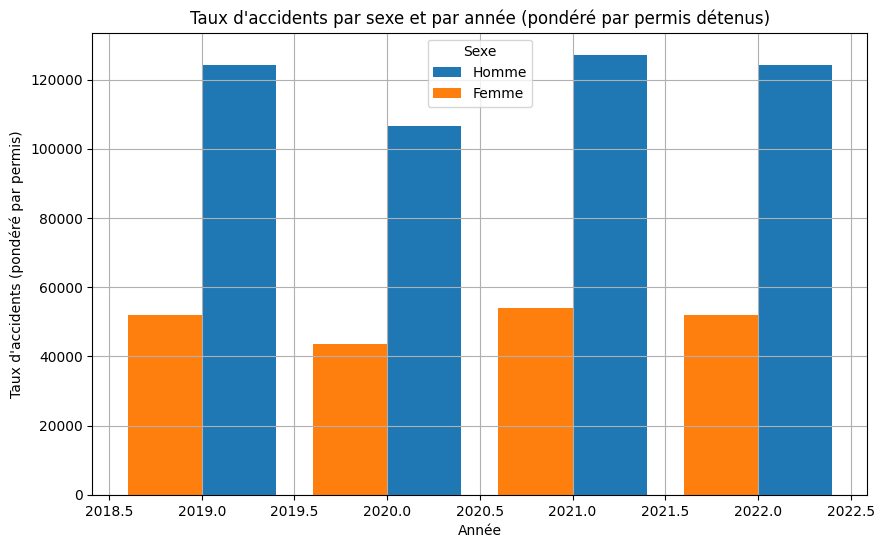

In [21]:
# Chemin vers le fichier nettoyé
file_path = 'final_cleaned_data_drivers_with_id_corrected_2.csv'

# Charger la base de données nettoyée
data = pd.read_csv(file_path, sep=';', low_memory=False)

# Filtrer les données pour exclure les enregistrements avec sexe -1
data_filtered = data[data['sexe'] != -1]

# Créer un DataFrame pour les accidents par sexe et par année
accidents_by_sex_year = data_filtered.groupby(['year', 'sexe']).size().reset_index(name='count')

# Remplacer les valeurs de 'sexe' pour les rendre plus lisibles
accidents_by_sex_year['sexe'] = accidents_by_sex_year['sexe'].replace({1: 'Homme', 2: 'Femme'})

# Pourcentage de permis détenus
percentage_permis_homme = 0.55
percentage_permis_femme = 0.45

# Calcul du taux d'accidents par permis détenus
accidents_by_sex_year['taux'] = accidents_by_sex_year.apply(
    lambda row: row['count'] / percentage_permis_homme if row['sexe'] == 'Homme' else row['count'] / percentage_permis_femme,
    axis=1
)

# Créer le graphique du taux d'accidents par permis détenus avec matplotlib
plt.figure(figsize=(10, 6))
for sexe in accidents_by_sex_year['sexe'].unique():
    subset = accidents_by_sex_year[accidents_by_sex_year['sexe'] == sexe]
    plt.bar(subset['year'] + (0.2 if sexe == 'Homme' else -0.2), subset['taux'], width=0.4, label=sexe)

plt.xlabel('Année')
plt.ylabel("Taux d'accidents (pondéré par permis)")
plt.title("Taux d'accidents par sexe et par année (pondéré par permis détenus)")
plt.legend(title='Sexe')
plt.grid(True)

# Sauvegarder le graphique en tant qu'image PNG
plt.savefig('taux_accidents_par_permis.png')

# Afficher le graphique
plt.show()


**Conclusion**

- **Men:** The accident rate weighted by licenses held remains higher than that of women, indicating a higher frequency of accidents per male driver.
- **Women:** Although women hold fewer driving licenses, their adjusted accident rate remains lower, suggesting better relative performance in terms of road safety.

#### **2. Accident Severity**


**a. Average Accident Severity for Each Gender**

**Meaning of Severity Labels**

The values in the grav column correspond to:

- 1: Uninjured
- 2: Lightly Injured
- 3: Seriously Injured
- 4: Killed


Gravité moyenne des accidents par sexe :
sexe
1    2.394054
2    2.482737
Name: grav, dtype: float64


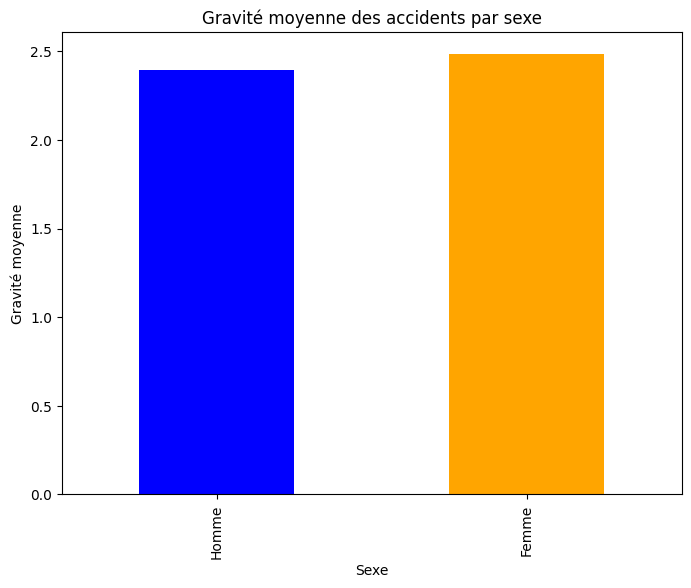

In [26]:
data_filtered = data[data['sexe'] != -1]
# Gravité moyenne des accidents par sexe
average_severity_by_sex = data_filtered.groupby('sexe')['grav'].mean()

# Afficher les résultats
print("Gravité moyenne des accidents par sexe :")
print(average_severity_by_sex)

# Visualisation de la gravité moyenne des accidents par sexe
plt.figure(figsize=(8, 6))
average_severity_by_sex.plot(kind='bar', color=['blue', 'orange'])
plt.title('Gravité moyenne des accidents par sexe')
plt.xlabel('Sexe')
plt.ylabel('Gravité moyenne')
plt.xticks(ticks=[0, 1], labels=['Homme', 'Femme'])
plt.show()

<ipython-input-22-31f0d05defe0>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



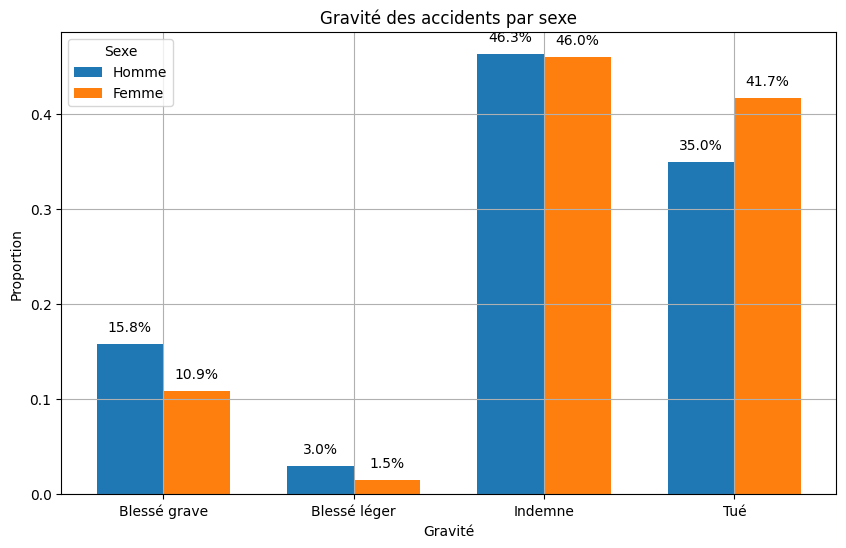

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Chemin vers le fichier nettoyé
file_path = 'final_cleaned_data_drivers_with_id_corrected_2.csv'

# Charger la base de données nettoyée
data = pd.read_csv(file_path, sep=';', low_memory=False)

# Filtrer les données pour exclure les enregistrements avec sexe -1 et grav -1
data_filtered = data[(data['sexe'] != -1) & (data['grav'] != -1)]

# Remplacer les valeurs de 'grav' par des labels lisibles
grav_labels = {1: 'Indemne', 2: 'Blessé léger', 3: 'Blessé grave', 4: 'Tué'}
data_filtered['grav'] = data_filtered['grav'].replace(grav_labels)

# Calculer la gravité moyenne des accidents par sexe
average_severity_by_sex = data_filtered.groupby('sexe')['grav'].value_counts(normalize=True).unstack().fillna(0)

# Remplacer les valeurs de 'sexe' pour les rendre plus lisibles
average_severity_by_sex.index = average_severity_by_sex.index.map({1: 'Homme', 2: 'Femme'})

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))

width = 0.35  # Largeur des barres
x = np.arange(len(average_severity_by_sex.columns))  # Lieux pour les labels de gravité

for i, sexe in enumerate(average_severity_by_sex.index):
    ax.bar(x + i * width, average_severity_by_sex.loc[sexe], width, label=sexe)
    for j, value in enumerate(average_severity_by_sex.loc[sexe]):
        ax.text(x[j] + i * width, value + 0.01, f'{value:.1%}', ha='center', va='bottom')

ax.set_xlabel('Gravité')
ax.set_ylabel('Proportion')
ax.set_title('Gravité des accidents par sexe')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(average_severity_by_sex.columns)
ax.legend(title='Sexe')

plt.grid(True)

# Sauvegarder le graphique en tant qu'image PNG
plt.savefig('gravite_accidents_par_sexe.png')

# Afficher le graphique
plt.show()



**General Conclusions**

- **Accident Severity:**

Men have a higher proportion of serious and minor injuries compared to women.
Women have a higher proportion of fatalities in accidents.
- **Indemnity:**

The proportion of drivers coming out uninjured is almost identical between men and women, indicating that the chances of coming out uninjured from an accident do not depend much on the driver's gender.


**b. Significant Differences in Accident Severity**

To determine if there are significant differences, we can use a **Mann-Whitney U** test.



In [25]:
from scipy.stats import mannwhitneyu

# Effectuer le test de Mann-Whitney U
stat, p = mannwhitneyu(data[data['sexe'] == 1]['grav'], data[data['sexe'] == 2]['grav'])

# Afficher les résultats
print("Statistique U : ", stat)
print("p-value : ", p)


Statistique U :  11533954075.5
p-value :  2.6414225717112386e-81


**Interpretation**
- U Statistic:

The U statistic is an indicator of the sum of the ranks of the observations. A high or low U compared to its distribution under the null hypothesis can indicate a significant difference between groups.
- p-value:

The p-value is extremely small, well below the common threshold of 0.05. Such a small p-value indicates that it is highly unlikely that the observed differences between the distributions of accident severity for men and women are due to chance.


**Implications**
- **Accident Severity:**

The results of the **Mann-Whitney U** test confirm that the distribution of accident severity differs significantly between men and women. This supports the observations made in the graph, where we saw that the proportions of different levels of accident severity are not the same for both genders.
- **Actions and Recommendations:**

Based on these results, it may be useful to conduct further research to understand why these differences exist.


#### **3. Driving Conditions**


**a. Influence of Age and Driving Experience**

For this section, we need to create age groups and analyze the distribution of accidents by age group and gender.


age_group
25-34    84019
35-44    66193
18-24    61284
45-54    55672
55-64    42259
65-74    21267
75+      15362
<18       9399
Name: count, dtype: int64


<ipython-input-24-f62752205bce>:26: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



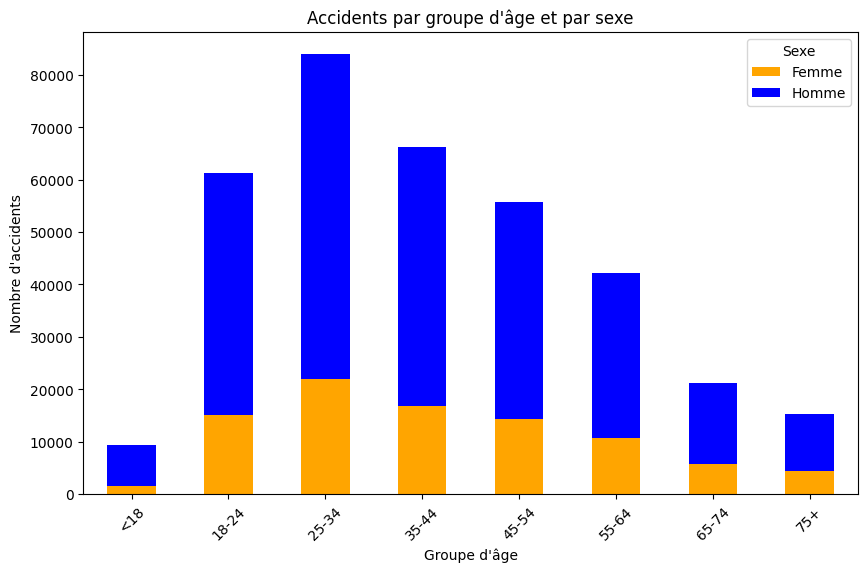

In [24]:
import numpy as np

# Chemin vers le fichier nettoyé
file_path = 'final_cleaned_data_drivers_with_id_corrected_2.csv'

# Charger la base de données nettoyée
data = pd.read_csv(file_path, sep=';', low_memory=False)

data = data[data['sexe'] != -1]

# Nettoyer les données de 'an_nais'
data['an_nais'] = pd.to_numeric(data['an_nais'], errors='coerce')

# Créer des groupes d'âge
bins = [0, 18, 25, 35, 45, 55, 65, 75, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
data['age_group'] = pd.cut(data['an_nais'].apply(lambda x: 2023 - x if not pd.isnull(x) else -1), bins=bins, labels=labels)

# Vérifier les groupes d'âge créés
print(data['age_group'].value_counts())

# Filtrer les données pour exclure les âges non spécifiés
data_filtered = data[data['age_group'].notnull()]

# Préparer les données pour Matplotlib
age_group_sex = data_filtered.groupby(['age_group', 'sexe']).size().reset_index(name='count')
age_group_sex['sexe'] = age_group_sex['sexe'].replace({1: 'Homme', 2: 'Femme'})

# Pivot des données pour une utilisation plus facile dans Matplotlib
pivot_df = age_group_sex.pivot(index='age_group', columns='sexe', values='count').fillna(0)

# Création du graphique avec Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Définir les couleurs pour chaque sexe
colors = {'Homme': 'blue', 'Femme': 'orange'}

# Tracer les barres empilées avec les couleurs spécifiées
pivot_df.plot(kind='bar', stacked=True, ax=ax, color=[colors[col] for col in pivot_df.columns])

ax.set_xlabel('Groupe d\'âge')
ax.set_ylabel('Nombre d\'accidents')
ax.set_title('Accidents par groupe d\'âge et par sexe')
ax.legend(title='Sexe')

plt.xticks(rotation=45)

# Sauvegarder le graphique en tant qu'image PNG
plt.savefig('accidents_par_groupe_age_et_sexe.png')

# Afficher le graphique
plt.show()


**General Conclusions**

- **Young Drivers:** Young drivers (18-24 years old) present a higher risk of accidents, suggesting the need for targeted training and awareness programs for this age group.
- **Drivers aged 25-34:** This group has the highest number of accidents, indicating a potential need for enhanced safety measures for young adults.
- **Decrease with Age:** The likelihood of accidents decreases with age, but it remains important to continue promoting road safety for older drivers.

**Recommended Actions**

- **Increased Controls:** Implement stricter controls for the most at-risk age groups.
- **Support for Older Drivers:** Offer driving retraining programs for older drivers to maintain their safety on the road.


**Note:** The 2022 accident report from ONISR was published in March 2024. You might say: yes, but women drive less than men, they cover fewer kilometers, etc. Well, think again, this same report explains that women drive an average of 11,200 km per year, compared to 12,500 km for men! And, these 1,300 km of difference do not justify the higher accident rates involving men!
